<a href="https://colab.research.google.com/github/DiptangshuPattadar/python_new/blob/main/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
### Q.1

import nltk
import re
import string
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist

nltk.download('stopwords')

# Sample Paragraph
text = '''Books are gateways to endless worlds. Reading every day expands knowledge, improves vocabulary, and boosts imagination.
Whether it's fiction, non-fiction, or fantasy, there's always something for everyone. In a fast-paced digital age, books offer a quiet escape.
Libraries and online platforms make books more accessible than ever before.'''

# 1. Lowercase and remove punctuation
cleaned_text = re.sub(r'[^\w\s]', '', text.lower())

# 2. Tokenize (No punkt used)
tokenizer = TreebankWordTokenizer()
word_tokens = tokenizer.tokenize(cleaned_text)

# Fallback for sentence tokenization (manual)
sentence_tokens = [s.strip() for s in text.split('.') if s.strip()]

# 3. Python split vs NLTK (Treebank) tokenizer
split_words = cleaned_text.split()
print("Python split():", split_words)
print("Treebank tokenizer:", word_tokens)

# 4. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [w for w in word_tokens if w not in stop_words]

fdist = FreqDist(filtered_words)
print("Word Frequency:\n", dict(fdist))


Python split(): ['books', 'are', 'gateways', 'to', 'endless', 'worlds', 'reading', 'every', 'day', 'expands', 'knowledge', 'improves', 'vocabulary', 'and', 'boosts', 'imagination', 'whether', 'its', 'fiction', 'nonfiction', 'or', 'fantasy', 'theres', 'always', 'something', 'for', 'everyone', 'in', 'a', 'fastpaced', 'digital', 'age', 'books', 'offer', 'a', 'quiet', 'escape', 'libraries', 'and', 'online', 'platforms', 'make', 'books', 'more', 'accessible', 'than', 'ever', 'before']
Treebank tokenizer: ['books', 'are', 'gateways', 'to', 'endless', 'worlds', 'reading', 'every', 'day', 'expands', 'knowledge', 'improves', 'vocabulary', 'and', 'boosts', 'imagination', 'whether', 'its', 'fiction', 'nonfiction', 'or', 'fantasy', 'theres', 'always', 'something', 'for', 'everyone', 'in', 'a', 'fastpaced', 'digital', 'age', 'books', 'offer', 'a', 'quiet', 'escape', 'libraries', 'and', 'online', 'platforms', 'make', 'books', 'more', 'accessible', 'than', 'ever', 'before']
Word Frequency:
 {'books':

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#  Q2:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

alpha_words = re.findall(r'\b[a-zA-Z]+\b', cleaned_text)


filtered_alpha = [w for w in alpha_words if w not in stop_words]

stemmer = PorterStemmer()
stemmed = [stemmer.stem(w) for w in filtered_alpha]


lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(w) for w in filtered_alpha]

print("Stemmed:", stemmed)
print("Lemmatized:", lemmatized)

[nltk_data] Downloading package wordnet to /root/nltk_data...


Stemmed: ['book', 'gateway', 'endless', 'world', 'read', 'everi', 'day', 'expand', 'knowledg', 'improv', 'vocabulari', 'boost', 'imagin', 'whether', 'fiction', 'nonfict', 'fantasi', 'there', 'alway', 'someth', 'everyon', 'fastpac', 'digit', 'age', 'book', 'offer', 'quiet', 'escap', 'librari', 'onlin', 'platform', 'make', 'book', 'access', 'ever']
Lemmatized: ['book', 'gateway', 'endless', 'world', 'reading', 'every', 'day', 'expands', 'knowledge', 'improves', 'vocabulary', 'boost', 'imagination', 'whether', 'fiction', 'nonfiction', 'fantasy', 'there', 'always', 'something', 'everyone', 'fastpaced', 'digital', 'age', 'book', 'offer', 'quiet', 'escape', 'library', 'online', 'platform', 'make', 'book', 'accessible', 'ever']


In [4]:
# Q3
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

texts = [
    "The phone battery lasts all day and charges fast.",
    "Excellent camera quality but the phone is expensive.",
    "Average performance and build quality for the price."
]

cv = CountVectorizer()
bow = cv.fit_transform(texts)
print("\nBag of Words:", cv.get_feature_names_out())

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)


import numpy as np
feature_names = tfidf.get_feature_names_out()
for i, text in enumerate(texts):
    row = tfidf_matrix[i].toarray()[0]
    top_idx = np.argsort(row)[-3:][::-1]
    top_keywords = [(feature_names[i], row[i]) for i in top_idx]
    print(f"Top keywords for text {i+1}: {top_keywords}")


Bag of Words: ['all' 'and' 'average' 'battery' 'build' 'but' 'camera' 'charges' 'day'
 'excellent' 'expensive' 'fast' 'for' 'is' 'lasts' 'performance' 'phone'
 'price' 'quality' 'the']
Top keywords for text 1: [('charges', np.float64(0.36501148642845177)), ('day', np.float64(0.36501148642845177)), ('fast', np.float64(0.36501148642845177))]
Top keywords for text 2: [('camera', np.float64(0.3920626253314354)), ('excellent', np.float64(0.3920626253314354)), ('expensive', np.float64(0.3920626253314354))]
Top keywords for text 3: [('price', np.float64(0.3920626253314354)), ('average', np.float64(0.3920626253314354)), ('for', np.float64(0.3920626253314354))]


In [6]:
## Q.4

import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import TreebankWordTokenizer

text1 = "Artificial Intelligence is transforming industries with automation and data insights."
text2 = "Blockchain is revolutionizing finance by ensuring secure, transparent transactions."

vec = TfidfVectorizer(stop_words='english')
tfidf_mat = vec.fit_transform([text1, text2])

tokenizer = TreebankWordTokenizer()
tokens1 = tokenizer.tokenize(re.sub(r'[^a-zA-Z ]', '', text1.lower()))
tokens2 = tokenizer.tokenize(re.sub(r'[^a-zA-Z ]', '', text2.lower()))

set1 = set(tokens1)
set2 = set(tokens2)

intersection = set1.intersection(set2)
union = set1.union(set2)
jaccard_sim = len(intersection) / len(union) if union else 0

# 2b. Cosine Similarity
cos_sim = cosine_similarity(tfidf_mat[0:1], tfidf_mat[1:2])[0][0]

# Output results
print("Tokens 1:", tokens1)
print("Tokens 2:", tokens2)
print("Jaccard Similarity:", jaccard_sim)
print("Cosine Similarity:", cos_sim)

# 2c. Comment: Cosine usually gives better insight for semantic similarity


Tokens 1: ['artificial', 'intelligence', 'is', 'transforming', 'industries', 'with', 'automation', 'and', 'data', 'insights']
Tokens 2: ['blockchain', 'is', 'revolutionizing', 'finance', 'by', 'ensuring', 'secure', 'transparent', 'transactions']
Jaccard Similarity: 0.05555555555555555
Cosine Similarity: 0.0


Review Sentiments: [('This product is amazing and works perfectly!', 'Positive'), ('Not worth the money, very disappointed.', 'Negative'), ("It's okay, nothing special.", 'Positive')]


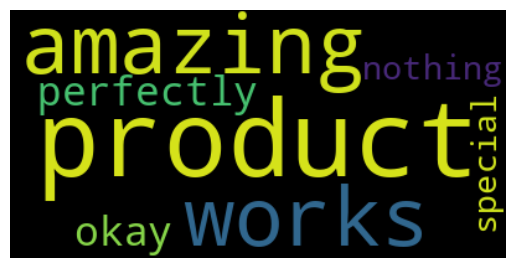

In [7]:
# Q5
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = [
    "This product is amazing and works perfectly!",
    "Not worth the money, very disappointed.",
    "It's okay, nothing special."
]

# 1. Sentiment Analysis
polarities = []
for review in reviews:
    blob = TextBlob(review)
    polarities.append(blob.sentiment.polarity)

# 2. Classification
labels = []
for p in polarities:
    if p > 0:
        labels.append("Positive")
    elif p < 0:
        labels.append("Negative")
    else:
        labels.append("Neutral")

print("Review Sentiments:", list(zip(reviews, labels)))

# 3. Word Cloud for Positive Reviews
positive_text = ' '.join([r for i, r in enumerate(reviews) if labels[i] == "Positive"])
wordcloud = WordCloud().generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [10]:
### Q.6

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


para = """Data science is a growing field. It combines statistics, programming, and domain knowledge.
With enough data, models can make accurate predictions. Machine learning is at the core of this field."""

tokenizer = Tokenizer()
tokenizer.fit_on_texts([para])
total_words = len(tokenizer.word_index) + 1
token_list = tokenizer.texts_to_sequences([para])[0]


sequences = []
for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    sequences.append(n_gram_seq)

sequences = pad_sequences(sequences, padding='pre')
x, y = sequences[:, :-1], sequences[:, -1]

# Build model
model = Sequential()
model.add(Embedding(total_words, 10, input_length=x.shape[1]))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x, y, epochs=200, verbose=0)

# Generate text from a seed
seed_text = "data"
next_words = 5

for _ in range(next_words):
    token_seq = tokenizer.texts_to_sequences([seed_text])[0]
    token_seq = pad_sequences([token_seq], maxlen=x.shape[1], padding='pre')
    predicted = model.predict(token_seq, verbose=0)
    predicted_word = ''
    for word, index in tokenizer.word_index.items():
        if index == np.argmax(predicted):
            predicted_word = word
            break
    seed_text += " " + predicted_word

print("Generated Text:", seed_text)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Generated Text: data science science a growing field
